# Statements EXPERT

Esta tabla contiene la información de las sentencias.  --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *

TARGET_FEATURE = 'statement__expertise_level'
TARGET_CLASS = 'EXPERT'
full_table = get_data('statements')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-05-28 11:02:42.388091 Data cache files found ...
2024-05-28 11:02:42.793615 Data cache files successfully loaded!!
The dataset contains 457483 (73.83%) instances for BEGINNER class and 162184 (26.17%) for EXPERT class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'statements'
TABLE_FEATURES = ['statement__category', 'statement__parent', 'statement__statement_role', 'statement__first_child_category','statement__second_child_category','statement__third_child_category', 'statement__height', 'statement__depth', 'statement__has_or_else', 'statement__body_size']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

Features shape: (162184, 10)
As we can see the downloaded data contains a total of 162184 instances. For each instance we have 10 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 162184 entries, 422732 to 619666
Data columns (total 10 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   statement__category               162184 non-null  object 
 1   statement__parent                 162184 non-null  object 
 2   statement__statement_role         162184 non-null  object 
 3   statement__first_child_category   140501 non-null  object 
 4   statement__second_child_category  94475 non-null   object 
 5   statement__third_child_category   1096 non-null    object 
 6   statement__height                 162184 non-null  int64  
 7   statement__depth                  162184 non-null  int64  
 8   statement__has_or_else            31904 non-null   object 
 9   statement__body_size              33994 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 13.6+ MB
None


Cómo podemos ver la tabla está compuesta por 3 variables numéricas y 7 de tipo objeto.

### 2.2 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [4]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [89.22%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [5]:
X.isnull().sum()

statement__category                      0
statement__parent                        0
statement__statement_role                0
statement__first_child_category      21683
statement__second_child_category     67709
statement__third_child_category     161088
statement__height                        0
statement__depth                         0
statement__has_or_else              130280
statement__body_size                128190
dtype: int64

### IMPORTANTE
Los nulos se deben a que esas variables solo son aplicables para ciertas categorias

In [6]:
print_empty_cols(X)

statement__category
-------------------
0 instancias no tienen un valor para la columna statement__category


statement__parent
-----------------
0 instancias no tienen un valor para la columna statement__parent


statement__statement_role
-------------------------
0 instancias no tienen un valor para la columna statement__statement_role


statement__first_child_category
-------------------------------
0 instancias no tienen un valor para la columna statement__first_child_category


statement__second_child_category
--------------------------------
0 instancias no tienen un valor para la columna statement__second_child_category


statement__third_child_category
-------------------------------
0 instancias no tienen un valor para la columna statement__third_child_category


statement__height
-----------------
0 instancias no tienen un valor para la columna statement__height


statement__depth
----------------
0 instancias no tienen un valor para la columna statement__depth


statement__h

### 2.4 - Describimos los valores de las variables de la tabla.

In [7]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
statement__category,162184,21,AssignmentStmt,81760,NaN,NaN,NaN,NaN,NaN,NaN,NaN
statement__parent,162184,11,FunctionDef,71783,NaN,NaN,NaN,NaN,NaN,NaN,NaN
statement__statement_role,162184,20,MethodDefBody,49120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
statement__first_child_category,140501,31,Variable,74889,NaN,NaN,NaN,NaN,NaN,NaN,NaN
statement__second_child_category,94475,32,Call,40872,NaN,NaN,NaN,NaN,NaN,NaN,NaN
statement__third_child_category,1096,22,Call,323,NaN,NaN,NaN,NaN,NaN,NaN,NaN
statement__height,162184.0,NaN,NaN,NaN,3.285077,2.154755,1.0,2.0,3.0,4.0,54.0
statement__depth,162184.0,NaN,NaN,NaN,2.920337,2.253359,0.0,1.0,3.0,4.0,56.0
statement__has_or_else,31904,2,False,23784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
statement__body_size,33994.0,NaN,NaN,NaN,2.04539,3.154719,1.0,1.0,1.0,2.0,276.0


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

In [8]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "statement__depth": [(0.0, 1.0), (1.0, 3.0), (3.0, 4.0), (4.0, inf)],  # min: 0.0 max: 82.0
    "statement__height": [(0.0, 2.0), (2.0, 3.0), (3.0, 4.0), (4.0, inf)],  # min: 1.0 max: 54.0
    "statement__body_size": [(-1.0, 1.0), (1.0, 2.0), (2.0, inf)],  # min: 1.0 max: 276
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['statement__depth'], 10))
print(get_statistics(X_copy, ['statement__height'], 10))
print(get_statistics(X_copy, ['statement__body_size'], 10))
print(get_statistics(X_copy, ['statement__category'], 10))
print(get_statistics(X_copy, ['statement__first_child_category'], 10))
print(get_statistics(X_copy, ['statement__second_child_category'], 10))
print(get_statistics(X_copy, ['statement__third_child_category'], 10))
print(get_statistics(X_copy, ['statement__parent'], 10))
print(get_statistics(X_copy, ['statement__statement_role'], 10))
print(get_statistics(X_copy, ['statement__has_or_else'], 10))


# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['module__function_defs_pct', 'module__number_of_classes'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
statement__depth  count  percentage
       [1.0_3.0)  53160   32.777586
       [4.0_inf]  52115   32.133256
       [3.0_4.0)  37076   22.860455
       [0.0_1.0)  19833   12.228703

statement__height  count  percentage
        [3.0_4.0)  61521   37.932842
        [4.0_inf]  51664   31.855177
        [2.0_3.0)  25632   15.804272
        [0.0_2.0)  23367   14.407710

statement__body_size  count  percentage
             unknown 128190   79.039856
           [1.0_2.0)  20041   12.356953
           [2.0_inf]  13953    8.603191

statement__category  count  percentage
     AssignmentStmt  81760   50.411878
                 If  23515   14.498964
             Return  14066    8.672865
         ImportFrom  11499    7.090095
                For   5817    3.586667
             Assert   5263    3.245080
             Import   5101    3.145193
AugmentedAssignment   4236    2.611848
              Raise   2325    1.433557
               With   2088    1.287427

statement__first_ch

In [9]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (162184, 142)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

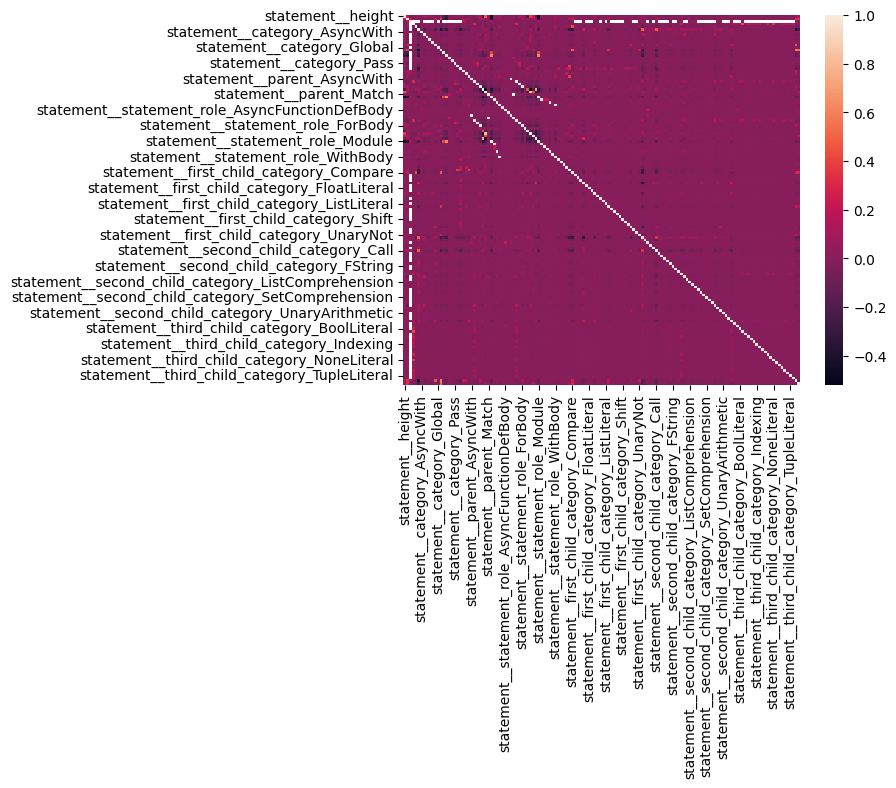

In [10]:
sns.heatmap(X.corr(), annot=False)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 10 variable (1 booleana, 3 numericas, 6 categorica) se hara un analisis detallado

### Variable has_or_else (1/10)
Esta variable es de tipo booleano y representa si ciertas categorias de statements tienen la clausula else. El primer paso es hacer un análisis visual de como se distribuyen los valores de la variable.

<Axes: xlabel='statement__has_or_else', ylabel='Count'>

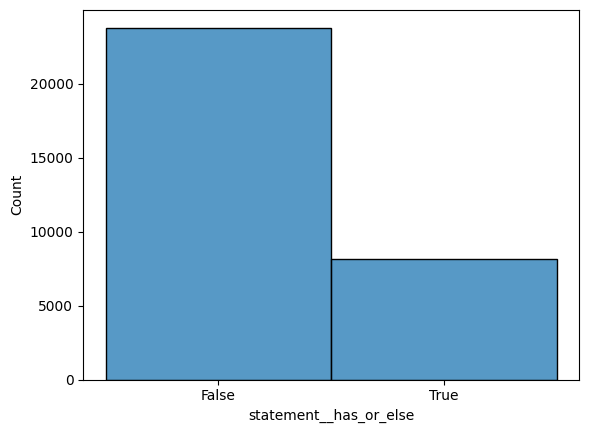

In [11]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(full_table['statement__has_or_else'], discrete=True)

In [12]:
num_true_values = len(full_table[full_table['statement__has_or_else'] == True])
num_false_values = len(full_table[full_table['statement__has_or_else'] == False])
std = full_table['statement__has_or_else'].std()
freq_true = len(full_table[full_table['statement__has_or_else'] == True]) / len(full_table['statement__has_or_else'])
freq_false = len(full_table[full_table['statement__has_or_else'] == False]) / len(full_table['statement__has_or_else'])
print(f'La variable has_or_else contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_or_else a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_or_else a False es {freq_false}.')

La variable has_or_else contiene 8120 valores verdaderos y 23784 valores falsos. Y, la desviación típica es de 0.4355942441678455
La frecuencia con la que programa puede tener la variable has_or_else a True es 0.05006659103240763.
La frecuencia con la que programa puede tener la variable has_or_else a False es 0.14664825136881568.


### IMPORTANTE
No suma el 100% debido a los valores nulos

In [13]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(full_table, 'statement__has_or_else', possible_values)

La variable statement__has_or_else contiene 3 valores distintos.
El umbral de outlier es de 0.06666666666666667%
La variable statement__has_or_else toma el valor de False en un 14.66% de los items.
La variable statement__has_or_else toma el valor de True en un 5.007% de los items.
La variable statement__has_or_else toma el valor de None en un 0.0% de los items. [OUTLIER]


In [14]:
full_table[full_table['statement__has_or_else'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,statement__category,statement__parent,statement__statement_role,statement__first_child_category,statement__second_child_category,statement__third_child_category,statement__height,statement__depth,statement__has_or_else,statement__body_size,statement__expertise_level
count,8120,8120,8120,8008,31,0,8120.000000,8120.000000,8120,8120.000000,8120
unique,4,10,16,11,4,0,NaN,NaN,1,NaN,1
top,If,If,IfElseBody,Compare,Call,NaN,NaN,NaN,True,NaN,EXPERT
freq,7973,3639,2213,3772,14,NaN,NaN,NaN,8120,NaN,8120
mean,NaN,NaN,NaN,NaN,NaN,NaN,4.470567,6.165640,NaN,1.848153,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,3.827687,4.063121,NaN,1.662486,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,4.000000,NaN,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,5.000000,NaN,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,7.000000,NaN,2.000000,NaN


### Variable height (2/10)
Esta variable representa la distancia del statement al root del módulo (fichero). Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 54. Con una media de 3.28.

<Axes: ylabel='statement__height'>

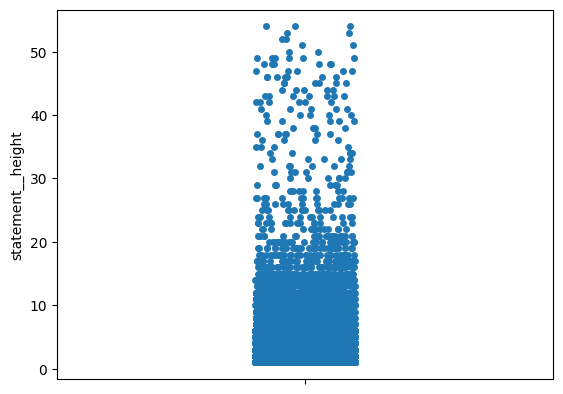

In [15]:
sns.stripplot(X['statement__height'])

In [16]:
print_outliers_for_df_column(X, 'statement__height')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8170360754121024
Rango valores atípicos extremos (Tukey): [-4.0,10.0]
Rango valores atípicos leves (Tukey): [-1.0,7.0]
Rango valores atípicos extremos (Fixed BoxPlot): [1.8281294970012063,82.78767612786393]
-3.0IQR: 0 instancias tienen un valor para statement__height inferior a -4.0 (Q1-3*IQR) para statement__height. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para statement__height inferior a -1.0 (Q1-1.5*IQR) para statement__height. Representando un 0.0% del total de instancias.
+1.5IQR: 4634 instancias tienen un valor para statement__height superior a 7.0 (Q3+1.5*IQR) para statement__height. Representando un 2.857% del total de instancias.
+3.0IQR: 1498 instancias tienen un valor para statement__height superior a 10.0 (Q3-3*IQR) para statement__height. Representando un 0.9236% del total de instancias.
L: 23367 instancias tienen un valor para statement__height inferior a 1.82812949700

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 10.0 (Con un MC de 81 usamos Tuckey Extremo)

In [17]:
X[X['statement__height'] > 10].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,statement__height,statement__depth,statement__body_size,statement__category_AnnotatedAssignment,statement__category_Assert,statement__category_AssignmentStmt,statement__category_AsyncWith,statement__category_AugmentedAssignment,statement__category_Break,statement__category_Continue,...,statement__third_child_category_NoneLiteral,statement__third_child_category_Pow,statement__third_child_category_SetComprehension,statement__third_child_category_SetLiteral,statement__third_child_category_StringLiteral,statement__third_child_category_Ternary,statement__third_child_category_TupleLiteral,statement__third_child_category_Variable,statement__has_or_else_False,statement__has_or_else_True
count,1498.000000,1498.000000,502.000000,1498.0,1498.000000,1498.000000,1498.0,1498.000000,1498.000000,1498.000000,...,1498.0,1498.0,1498.0,1498.0,1498.0,1498.0,1498.0,1498.000000,1498.000000,1498.000000
mean,16.050066,5.008011,1.772908,0.0,0.001335,0.437917,0.0,0.083445,0.016021,0.010681,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002670,0.141522,0.193591
std,8.486039,6.506351,1.241427,0.0,0.036527,0.496296,0.0,0.276645,0.125599,0.102829,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.051622,0.348676,0.395244
min,11.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,11.000000,2.000000,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,12.000000,3.000000,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,16.000000,6.000000,2.000000,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
max,54.000000,47.000000,9.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000


### Variable depth (3/10)
Esta variable representa la distancia desde el statement hasta una hoja del ast. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 56. Con una media de 2.92.

<Axes: ylabel='statement__depth'>

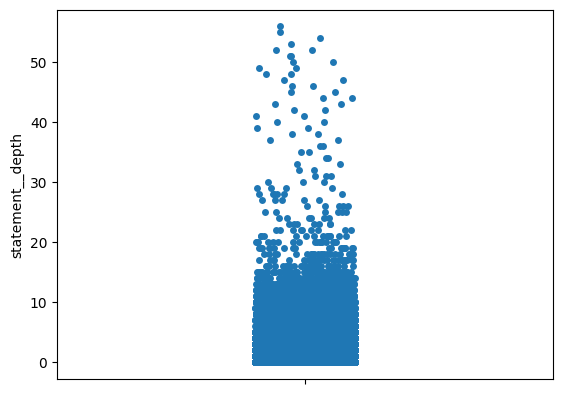

In [18]:
sns.stripplot(X['statement__depth'])

In [19]:
print_outliers_for_df_column(X, 'statement__depth')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9102475020687217
Rango valores atípicos extremos (Tukey): [-8.0,13.0]
Rango valores atípicos leves (Tukey): [-3.5,8.5]
Rango valores atípicos extremos (Fixed BoxPlot): [0.8139591229752363,175.5830498455354]
-3.0IQR: 0 instancias tienen un valor para statement__depth inferior a -8.0 (Q1-3*IQR) para statement__depth. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para statement__depth inferior a -3.5 (Q1-1.5*IQR) para statement__depth. Representando un 0.0% del total de instancias.
+1.5IQR: 2791 instancias tienen un valor para statement__depth superior a 8.5 (Q3+1.5*IQR) para statement__depth. Representando un 1.721% del total de instancias.
+3.0IQR: 375 instancias tienen un valor para statement__depth superior a 13.0 (Q3-3*IQR) para statement__depth. Representando un 0.2312% del total de instancias.
L: 19833 instancias tienen un valor para statement__depth inferior a 0.8139591229752363 para

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 13.0 (Con un MC de 92 usamos Tuckey Extremo)

In [20]:
X[X['statement__depth'] > 13].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,statement__height,statement__depth,statement__body_size,statement__category_AnnotatedAssignment,statement__category_Assert,statement__category_AssignmentStmt,statement__category_AsyncWith,statement__category_AugmentedAssignment,statement__category_Break,statement__category_Continue,...,statement__third_child_category_NoneLiteral,statement__third_child_category_Pow,statement__third_child_category_SetComprehension,statement__third_child_category_SetLiteral,statement__third_child_category_StringLiteral,statement__third_child_category_Ternary,statement__third_child_category_TupleLiteral,statement__third_child_category_Variable,statement__has_or_else_False,statement__has_or_else_True
count,375.000000,375.000000,372.000000,375.0,375.0,375.000000,375.0,375.0,375.0,375.0,...,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.000000,375.000000
mean,9.144000,20.786667,4.693548,0.0,0.0,0.008000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.354667,0.637333
std,9.564056,9.533074,15.199045,0.0,0.0,0.089203,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.479051,0.481412
min,1.000000,14.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
25%,3.000000,15.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
50%,5.000000,17.000000,2.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000
75%,10.000000,22.000000,5.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000
max,44.000000,56.000000,276.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000


### Variable body_size (4/10)
Esta variable representa el número de sentencias o expresiones que se definen dentro del cuerpo de ciertas categorías de sentencias. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 276. Con una media de 2.04.

<Axes: ylabel='statement__body_size'>

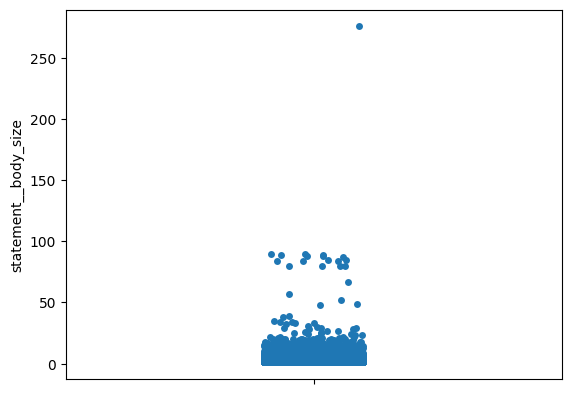

In [21]:
sns.stripplot(X['statement__body_size'])

### IMPORTANTE
Los valor maximo esta muy alejado de los siguientes.

In [22]:
print_outliers_for_df_column(X,'statement__body_size')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9766268229892306
Rango valores atípicos extremos (Tukey): [-2.0,5.0]
Rango valores atípicos leves (Tukey): [-0.5,3.5]
Rango valores atípicos extremos (Fixed BoxPlot): [0.9508426436588273,76.58746026105013]
-3.0IQR: 0 instancias tienen un valor para statement__body_size inferior a -2.0 (Q1-3*IQR) para statement__body_size. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para statement__body_size inferior a -0.5 (Q1-1.5*IQR) para statement__body_size. Representando un 0.0% del total de instancias.
+1.5IQR: 4009 instancias tienen un valor para statement__body_size superior a 3.5 (Q3+1.5*IQR) para statement__body_size. Representando un 2.472% del total de instancias.
+3.0IQR: 1606 instancias tienen un valor para statement__body_size superior a 5.0 (Q3-3*IQR) para statement__body_size. Representando un 0.9902% del total de instancias.
L: 0 instancias tienen un valor para statement__body_size inf

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 76.5 (Con un MC de 97 usamos U)

In [37]:
X[X['statement__body_size'] > 76.5].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,statement__height,statement__depth,statement__body_size,statement__category_AnnotatedAssignment,statement__category_Assert,statement__category_AssignmentStmt,statement__category_AsyncWith,statement__category_AugmentedAssignment,statement__category_Break,statement__category_Continue,...,statement__third_child_category_NoneLiteral,statement__third_child_category_Pow,statement__third_child_category_SetComprehension,statement__third_child_category_SetLiteral,statement__third_child_category_StringLiteral,statement__third_child_category_Ternary,statement__third_child_category_TupleLiteral,statement__third_child_category_Variable,statement__has_or_else_False,statement__has_or_else_True
count,17.000000,17.000000,17.000000,17.0,17.0,17.0,17.0,17.0,17.0,17.0,...,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0
mean,1.176471,3.823529,96.411766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
std,0.392953,6.502262,46.418018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,2.000000,80.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25%,1.000000,2.000000,84.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50%,1.000000,2.000000,85.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75%,1.000000,3.000000,89.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
max,2.000000,29.000000,276.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### IMPORTANTE
Hay que revisar el que tiene 276

### Variable category (5/10)
Esta variable es de tipo categórica y representa el tipo de sentencia.

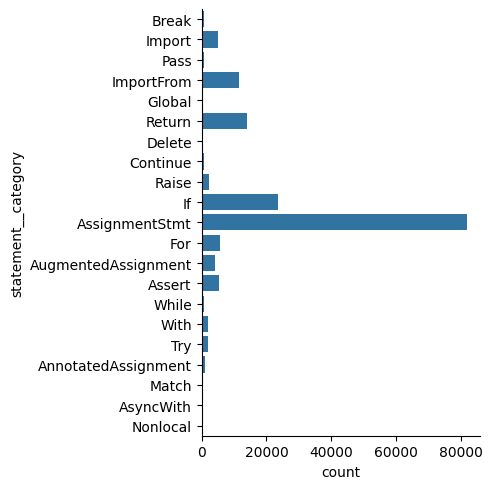

In [38]:
sns.catplot(full_table['statement__category'], kind="count")

In [39]:
possible_values = ['AssignmentStmt','If','Return','For','ImportFrom','Import','AugmentedAssignment','Raise','Try','Assert','While','With','Break','Pass','AnnotatedAssignment','Continue','Delete','Global','Match','Nonlocal','AsyncWith']
print_frequency_anal_for_cat_var(full_table, 'statement__category', possible_values)

La variable statement__category contiene 21 valores distintos.
El umbral de outlier es de 0.009523809523809525%
La variable statement__category toma el valor de AssignmentStmt en un 50.41% de los items.
La variable statement__category toma el valor de If en un 14.5% de los items.
La variable statement__category toma el valor de Return en un 8.673% de los items.
La variable statement__category toma el valor de ImportFrom en un 7.09% de los items.
La variable statement__category toma el valor de For en un 3.587% de los items.
La variable statement__category toma el valor de Assert en un 3.245% de los items.
La variable statement__category toma el valor de Import en un 3.145% de los items.
La variable statement__category toma el valor de AugmentedAssignment en un 2.612% de los items.
La variable statement__category toma el valor de Raise en un 1.434% de los items.
La variable statement__category toma el valor de With en un 1.287% de los items.
La variable statement__category toma el valor

### Variable parent (6/10)
Esta variable es de tipo categórica y representa el tipo del padre de la sentencia.

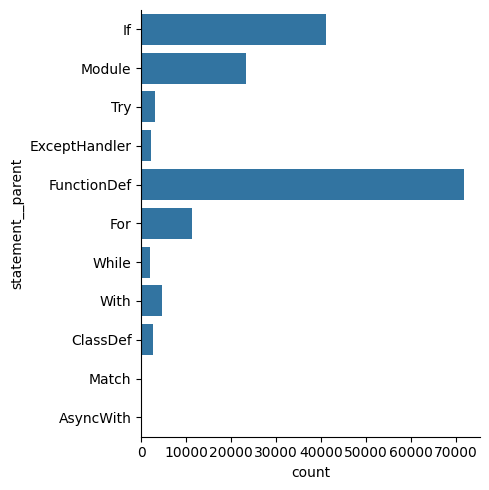

In [40]:
sns.catplot(full_table['statement__parent'], kind="count")

In [41]:
possible_values = ['FunctionDef','If','Module','For','While','Try','ExceptHandler','With','ClassDef','Match','AsyncWith']
print_frequency_anal_for_cat_var(full_table, 'statement__parent',possible_values)

La variable statement__parent contiene 11 valores distintos.
El umbral de outlier es de 0.018181818181818184%
La variable statement__parent toma el valor de FunctionDef en un 44.26% de los items.
La variable statement__parent toma el valor de If en un 25.29% de los items.
La variable statement__parent toma el valor de Module en un 14.41% de los items.
La variable statement__parent toma el valor de For en un 6.907% de los items.
La variable statement__parent toma el valor de With en un 2.876% de los items.
La variable statement__parent toma el valor de Try en un 1.919% de los items.
La variable statement__parent toma el valor de ClassDef en un 1.61% de los items.
La variable statement__parent toma el valor de ExceptHandler en un 1.373% de los items.
La variable statement__parent toma el valor de While en un 1.223% de los items.
La variable statement__parent toma el valor de Match en un 0.1319% de los items.
La variable statement__parent toma el valor de AsyncWith en un 0.0037% de los it

### Variable statement_role (7/10)
Esta variable es de tipo categórica y representa el rol que representa la sentencia en su padre.

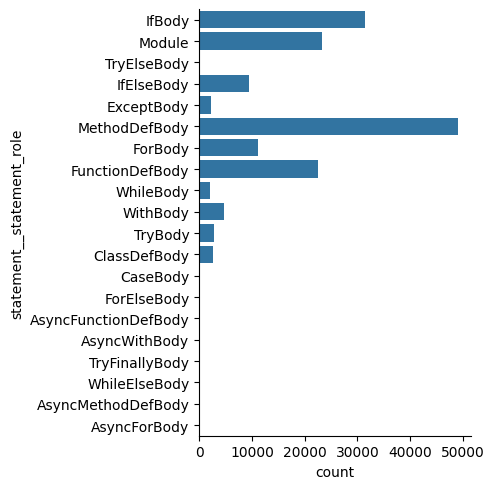

In [42]:
sns.catplot(full_table['statement__statement_role'], kind="count")

In [43]:
possible_values = ['MethodDefBody','IfBody','FunctionDefBody','Module','IfElseBody','ForBody','WhileBody','TryBody','ExceptBody','WithBody','ClassDefBody','TryElseBody','TryFinallyBody','ForElseBody','AsyncFunctionDefBody','CaseBody','WhileElseBody','AsyncMethodDefBody','AsyncWithBody','AsyncForBody']
print_frequency_anal_for_cat_var(full_table, 'statement__statement_role', possible_values)

La variable statement__statement_role contiene 20 valores distintos.
El umbral de outlier es de 0.01%
La variable statement__statement_role toma el valor de MethodDefBody en un 30.29% de los items.
La variable statement__statement_role toma el valor de IfBody en un 19.41% de los items.
La variable statement__statement_role toma el valor de Module en un 14.41% de los items.
La variable statement__statement_role toma el valor de FunctionDefBody en un 13.88% de los items.
La variable statement__statement_role toma el valor de ForBody en un 6.895% de los items.
La variable statement__statement_role toma el valor de IfElseBody en un 5.882% de los items.
La variable statement__statement_role toma el valor de WithBody en un 2.876% de los items.
La variable statement__statement_role toma el valor de TryBody en un 1.742% de los items.
La variable statement__statement_role toma el valor de ClassDefBody en un 1.61% de los items.
La variable statement__statement_role toma el valor de ExceptBody en

### Variable first_child_category (8/10)
Esta variable es de tipo categorica y representa la categoria del primer hijo de la sentencia.

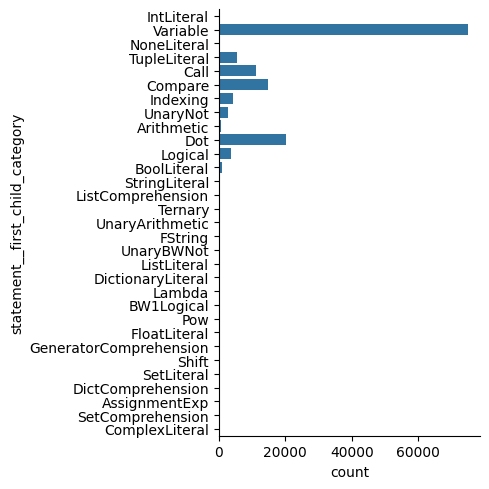

In [44]:
sns.catplot(full_table['statement__first_child_category'], kind="count")

In [45]:
possible_values = ['Variable','Compare','Dot','Call','Logical','Indexing','TupleLiteral','UnaryNot','BoolLiteral','NoneLiteral','Arithmetic','StringLiteral','ListLiteral','IntLiteral','DictionaryLiteral','Ternary','FString','ListComprehension','BW1Logical','GeneratorComprehension','UnaryArithmetic','DictComprehension','FloatLiteral','Lambda','ComplexLiteral','Shift','SetLiteral','SetComprehension','Pow','Await','UnaryBWNot','AssignmentExp']
print_frequency_anal_for_cat_var(full_table, 'statement__first_child_category', possible_values)

La variable statement__first_child_category contiene 33 valores distintos.
El umbral de outlier es de 0.006060606060606061%
La variable statement__first_child_category toma el valor de Variable en un 46.18% de los items.
La variable statement__first_child_category toma el valor de Dot en un 12.46% de los items.
La variable statement__first_child_category toma el valor de Compare en un 9.106% de los items.
La variable statement__first_child_category toma el valor de Call en un 6.905% de los items.
La variable statement__first_child_category toma el valor de TupleLiteral en un 3.391% de los items.
La variable statement__first_child_category toma el valor de Indexing en un 2.674% de los items.
La variable statement__first_child_category toma el valor de Logical en un 2.197% de los items.
La variable statement__first_child_category toma el valor de UnaryNot en un 1.712% de los items.
La variable statement__first_child_category toma el valor de BoolLiteral en un 0.6012% de los items.
La var

### Variable second_child_category (9/10)
Esta variable es de tipo categorica y representa la categoria del segundo hijo de la sentencia.

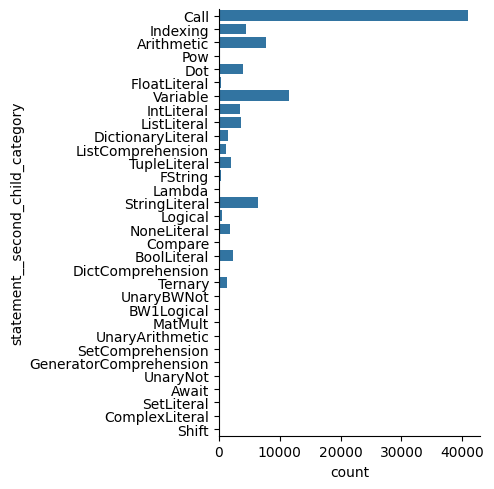

In [46]:
sns.catplot(full_table['statement__second_child_category'], kind="count")

In [47]:
possible_values = ['Call','Variable','Arithmetic','IntLiteral','StringLiteral','ListLiteral','Indexing','Dot','BoolLiteral','NoneLiteral','TupleLiteral','DictionaryLiteral','Logical','Ternary','ListComprehension','FString','UnaryArithmetic','Compare','FloatLiteral','BW1Logical','ComplexLiteral','GeneratorComprehension','Lambda','DictComprehension','UnaryNot','Pow','SetLiteral','MatMult','Shift','SetComprehension','Await','UnaryBWNot','Yield']
print_frequency_anal_for_cat_var(full_table, 'statement__second_child_category', possible_values)

La variable statement__second_child_category contiene 34 valores distintos.
El umbral de outlier es de 0.0058823529411764705%
La variable statement__second_child_category toma el valor de Call en un 25.2% de los items.
La variable statement__second_child_category toma el valor de Variable en un 7.065% de los items.
La variable statement__second_child_category toma el valor de Arithmetic en un 4.798% de los items.
La variable statement__second_child_category toma el valor de StringLiteral en un 3.998% de los items.
La variable statement__second_child_category toma el valor de Indexing en un 2.761% de los items.
La variable statement__second_child_category toma el valor de Dot en un 2.402% de los items.
La variable statement__second_child_category toma el valor de ListLiteral en un 2.247% de los items.
La variable statement__second_child_category toma el valor de IntLiteral en un 2.135% de los items.
La variable statement__second_child_category toma el valor de BoolLiteral en un 1.426% d

### IMPORTANTE
La diferencia con el anterior es el uso de YIELD

### Variable third_child_category (10/10)
Esta variable es de tipo categorica y representa la categoria del tercer hijo de la sentencia.

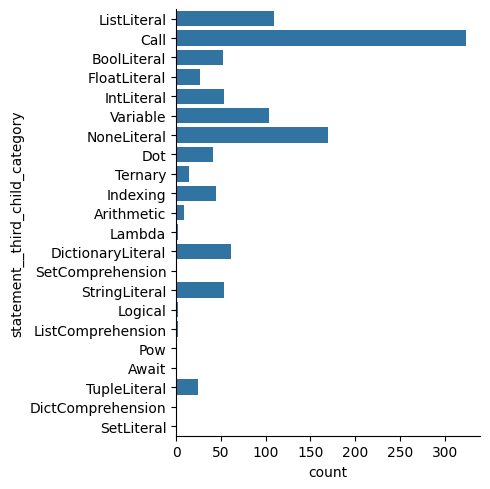

In [48]:
sns.catplot(full_table['statement__third_child_category'], kind="count")

In [50]:
possible_values = ['Call','NoneLiteral','ListLiteral','DictionaryLiteral','Variable','Dot','StringLiteral','Indexing','IntLiteral','TupleLiteral','BoolLiteral','Ternary','Arithmetic','FloatLiteral','Lambda','DictComprehension','ListComprehension','GeneratorComprehension','Logical','SetLiteral','BW1Logical','UnaryArithmetic','Pow','Await','SetComprehension']
print_frequency_anal_for_cat_var(full_table, 'statement__third_child_category', possible_values)

La variable statement__third_child_category contiene 26 valores distintos.
El umbral de outlier es de 0.007692307692307693%
La variable statement__third_child_category toma el valor de Call en un 0.1992% de los items.
La variable statement__third_child_category toma el valor de NoneLiteral en un 0.1042% de los items.
La variable statement__third_child_category toma el valor de ListLiteral en un 0.06721% de los items.
La variable statement__third_child_category toma el valor de Variable en un 0.06412% de los items.
La variable statement__third_child_category toma el valor de DictionaryLiteral en un 0.03761% de los items.
La variable statement__third_child_category toma el valor de StringLiteral en un 0.0333% de los items.
La variable statement__third_child_category toma el valor de IntLiteral en un 0.03268% de los items.
La variable statement__third_child_category toma el valor de BoolLiteral en un 0.03206% de los items.
La variable statement__third_child_category toma el valor de Index

## Multivariate

TODO: isolation forest algorithm

In [51]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

ValueError: Input X contains NaN.
IsolationForest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values